In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
healthcare = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/healthcare_dataset.csv?raw=true')

In [3]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
healthcare['Insurance Provider'].nunique()

5

In [5]:
healthcare.drop(['Name','Date of Admission','Hospital','Discharge Date'],axis=1,inplace=True)

In [6]:
healthcare.drop(['Doctor','Insurance Provider','Room Number'],axis=1,inplace=True)

In [7]:
healthcare.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Billing Amount       0
Admission Type       0
Medication           0
Test Results         0
dtype: int64

In [8]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                55500 non-null  int64  
 1   Gender             55500 non-null  object 
 2   Blood Type         55500 non-null  object 
 3   Medical Condition  55500 non-null  object 
 4   Billing Amount     55500 non-null  float64
 5   Admission Type     55500 non-null  object 
 6   Medication         55500 non-null  object 
 7   Test Results       55500 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.4+ MB


C:\Users\ACER\AppData\Local\Temp\ipykernel_8752\1903512450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=healthcare,x='Test Results',palette='mako')


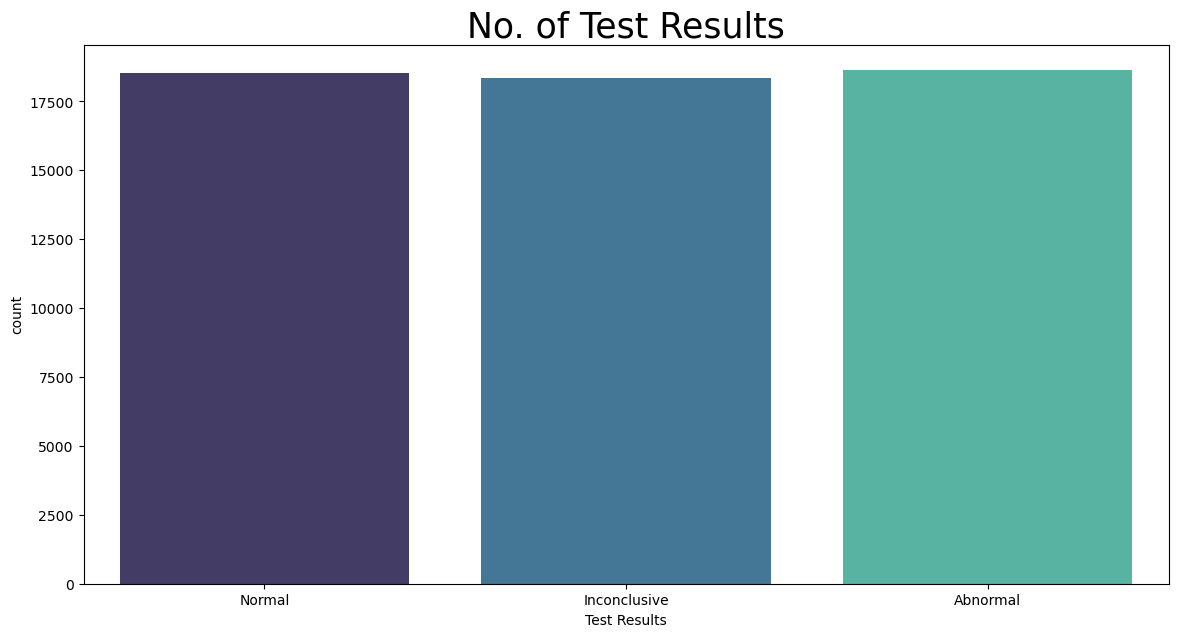

In [9]:
plt.figure(figsize=(14,7))
sns.countplot(data=healthcare,x='Test Results',palette='mako')
plt.title('No. of Test Results',size=25)
plt.show()

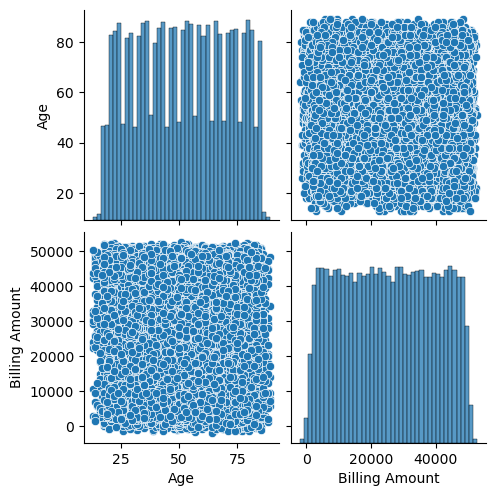

In [10]:
sns.pairplot(healthcare)

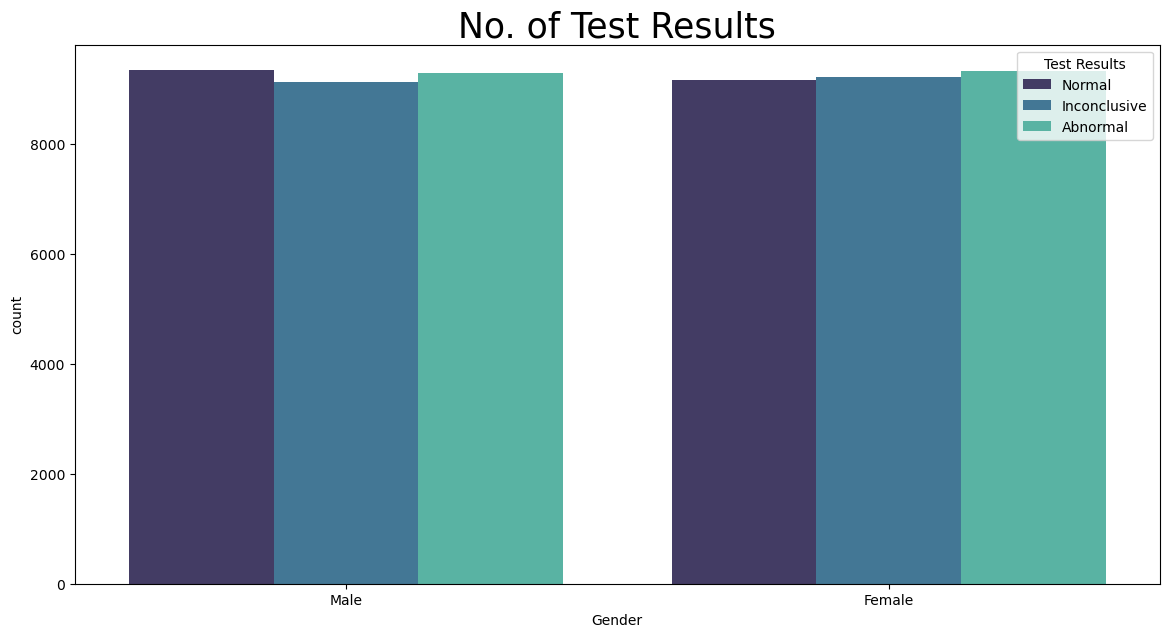

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(data=healthcare,x='Gender',palette='mako',hue='Test Results')
plt.title('No. of Test Results',size=25)
plt.show()

In [12]:
healthcare.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,14238.317814,Urgent,Penicillin,Abnormal


In [13]:
healthcare['Gender'] = healthcare['Gender'].map({'Male':0,'Female':1})

In [14]:
healthcare['Admission Type'] = healthcare['Admission Type'].map({'Elective':0,'Urgent':1,'Emergency':2})

In [15]:
healthcare = pd.get_dummies(data=healthcare,columns=['Blood Type','Medical Condition','Medication',],dtype='int')

In [16]:
healthcare.columns

Index(['Age', 'Gender', 'Billing Amount', 'Admission Type', 'Test Results',
       'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-',
       'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Medical Condition_Arthritis', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor',
       'Medication_Paracetamol', 'Medication_Penicillin'],
      dtype='object')

In [17]:
X = healthcare.drop('Test Results',axis=1)
Y = healthcare ['Test Results']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
predictions = knn_model.predict(X_test)

In [22]:
predictions

array(['Inconclusive', 'Abnormal', 'Inconclusive', ..., 'Abnormal',
       'Abnormal', 'Normal'], dtype=object)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

    Abnormal       0.36      0.51      0.42      3691
Inconclusive       0.38      0.30      0.34      3667
      Normal       0.39      0.31      0.34      3742

    accuracy                           0.37     11100
   macro avg       0.38      0.37      0.37     11100
weighted avg       0.38      0.37      0.37     11100



In [24]:
error = []
for k in range(1,9):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,Y_train)
    predictions = knn_model.predict(X_test)
    e = np.mean(Y_test!=predictions)
    error.append(e)

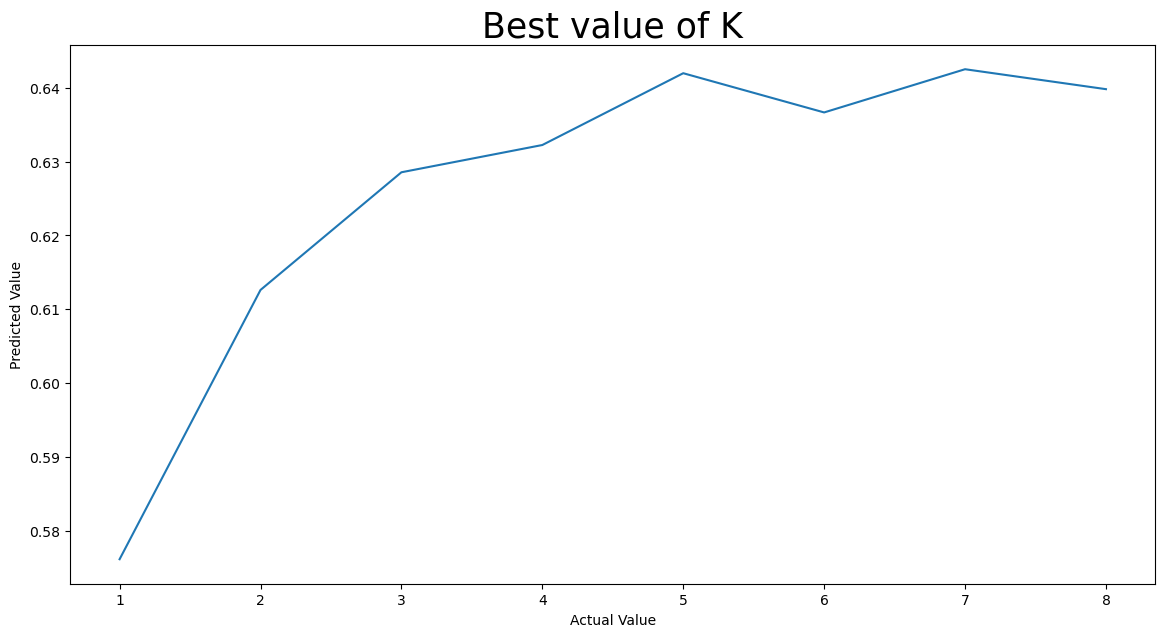

In [25]:
plt.figure(figsize=(14,7))
plt.plot(range(1,9),error)
plt.title('Best value of K',size=25)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()